In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
data = pd.read_csv('FoodBalanceSheets_E_Africa_NOFLAG.csv', encoding = 'ISO-8859-1')

In [3]:
data.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y2014,Y2015,Y2016,Y2017,Y2018
0,4,Algeria,2501,Population,511,Total Population - Both sexes,1000 persons,38924.00,39728.00,40551.00,41389.00,42228.00
1,4,Algeria,2501,Population,5301,Domestic supply quantity,1000 tonnes,0.00,0.00,0.00,0.00,0.00
2,4,Algeria,2901,Grand Total,664,Food supply (kcal/capita/day),kcal/capita/day,3377.00,3379.00,3372.00,3341.00,3322.00
3,4,Algeria,2901,Grand Total,674,Protein supply quantity (g/capita/day),g/capita/day,94.90,94.35,94.72,92.82,91.83
4,4,Algeria,2901,Grand Total,684,Fat supply quantity (g/capita/day),g/capita/day,80.06,79.36,77.40,80.19,77.28


In [4]:
data.columns

Index(['Area Code', 'Area', 'Item Code', 'Item', 'Element Code', 'Element',
       'Unit', 'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018'],
      dtype='object')

### Question 1 :

The sum of animal fat in 2014 and 2017


In [5]:
g = data.groupby('Item')
AF_2014 = g.get_group('Animal fats')['Y2014'].sum()
AF_2017 = g.get_group('Animal fats')['Y2017'].sum()
print('Sum of animal fat in 2014 =', AF_2014)
print() 
print('Sum of animal fat in 2017 =', AF_2017)


Sum of animal fat in 2014 = 209460.54

Sum of animal fat in 2017 = 269617.53


### Question 2

Mean and Standard deviation across the whole dataset

In [6]:
statistics_2015 = data.describe()['Y2015']
mean_2015 = statistics_2015['mean']
std_2015 = statistics_2015['std']
print('Mean value 2015 =', round(mean_2015, 3))
print('Standard deviation 2015 =', round(std_2015, 3))

Mean value 2015 = 135.236
Standard deviation 2015 = 1603.404


### Question 3

Total number and percentage of missing data in 2016

In [7]:
null= data.isnull().sum()
null_2016 = null['Y2016']
mean_null_2016 = (null_2016/len(data))*100
print('Count of null Values in 2016 =', null_2016) 
print() 
print('Percentage of null in year 2016 =', round(mean_null_2016, 2))

Count of null Values in 2016 = 1535

Percentage of null in year 2016 = 2.52


### Question 4

Year with the highest correlation with Element code 

In [8]:
col = ['Element Code','Y2014','Y2015','Y2016','Y2017','Y2018']
df_el = data[col]
correl = df_el.corr().sort_values(by='Element Code', ascending = False)
correl = correl.iloc[1:,0].sort_values(ascending = False) 

<AxesSubplot:>

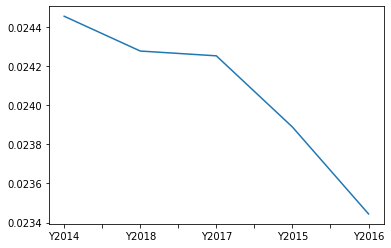

In [9]:
correl.plot() 

### Question 5

Year with the highest sum of Import Quantity 

In [10]:
d = data.groupby('Element')
years = ['Y2014','Y2015','Y2016','Y2017','Y2018']
iq_group = d.get_group('Import Quantity')[years].sum()
iq_group = iq_group.sort_values(ascending = False) 

Y2017    294559.09
Y2018    287997.09
Y2016    286582.78
Y2014    274144.48
Y2015    267018.46
dtype: float64


<AxesSubplot:>

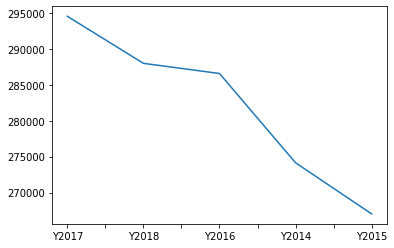

In [11]:
print(iq_group) 
iq_group.plot()

### Question 6

Total number of the sum of production in 2014

In [12]:
prod_2014 = d.get_group('Production')['Y2014'].sum()
print('The total sum of production in 2014 is :', prod_2014)

The total sum of production in 2014 is : 1931287.75


### Question 7

Element with the highest sum in 2018

In [13]:
ele_2018 = data[['Element', 'Y2018']]
highest = ele_2018.groupby('Element').sum()
highest = highest.sort_values(by = 'Y2018',ascending = False)
highest.iloc[0, :]

Y2018    2161192.1
Name: Domestic supply quantity, dtype: float64

### Question 8

Element with third lowest sum in 2018

In [14]:
third_lowest = highest.iloc[-3,:]
third_lowest

Y2018    11833.56
Name: Protein supply quantity (g/capita/day), dtype: float64

### Question 9

Total Import Quantity in Algeria in 2018

In [15]:
data_2018 = data[['Area', 'Element', 'Y2018']]
alg_data = data_2018[data_2018['Area']=="Algeria"]
alg_tot = alg_data.groupby('Element').get_group('Import Quantity')['Y2018'].sum()
print('Total Import Quantity in Algeria is :', alg_tot) 

Total Import Quantity in Algeria is : 36238.29


### Question 10

Number of unique countries in the dataset

In [16]:
unique_count = np.unique(data['Area'])
print('The number of unique countries in the dataset is :', len(unique_count)) 


The number of unique countries in the dataset is : 49
